<a href="https://colab.research.google.com/github/tylerlum/Tray_Image_Classifier_A/blob/master/ReadData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install googledrivedownloader

In [0]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1smbsz8AJ-VGhKbtr7NTvAVzTI3auI_C4',
                                    dest_path='./tray-data/file.7z')

!ls /content/tray-data

In [3]:
# Extract.7z file
!7z x /content/tray-data/file.7z 


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/tray-data/                             1 file, 987230795 bytes (942 MiB)

Extracting archive: /content/tray-data/file.7z
--
Path = /content/tray-data/file.7z
Type = 7z
Physical Size = 987230795
Headers Size = 38637
Method = LZMA2:26
Solid = +
Blocks = 1

  0%    
Would you like to replace the existing file:
  Path:     ./data_HiRes/multi/L01_S1_S4_S5/L1_S1_S4_S5_001.png
  Size:     174490 bytes (171 KiB)
  Modified: 2019-01-25 20:37:38
with the file from archive:
  Path:     data_HiRes/multi/L01_S1_S4_S5/L1_S1_S4_S5_001.png
  Size:     174490 bytes (171 KiB)
  Modified: 2019-01-25 20:37:38
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? 

In [4]:
!mv data_HiRes tray-data

mv: cannot move 'data_HiRes' to 'tray-data/data_HiRes': Directory not empty


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Setup for one hot encoding values
%cd /content/tray-data/data_HiRes/single
one_hot_encode = {}
types = [directory for directory in os.listdir('.')]
types.sort()
i = 0
for type in types:
  one_hot_encode[type] = i
  i = i + 1

/content/tray-data/data_HiRes/single


In [4]:
%cd /content/tray-data/data_HiRes/single
import os
full_dataset = {}
P = 0
for directory in os.listdir('.'):
  x_data = []
  y_data = []
  for png in os.listdir('/content/tray-data/data_HiRes/single/' + directory):
    im = cv2.imread('/content/tray-data/data_HiRes/single/' + directory + '/' + png)
    x_data.append(im)
    a = np.zeros((len(types), 1))
    a[one_hot_encode[directory]] = 1
    y_data.append(a)
  full_dataset[str(directory) + "_x"] = x_data
  full_dataset[str(directory) + "_y"] = y_data
  


/content/tray-data/data_HiRes/single


(325, 325, 3)


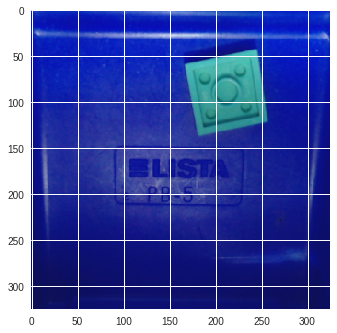

In [5]:
print(full_dataset['L11_x'][0].shape)
plt.imshow(full_dataset['L11_x'][10])

plt.imshow(b[1])

In [78]:
X_train = None
X_test = None
Y_train = None
Y_test = None

correct_x = 'L01_x'
i = 0
for im in full_dataset[correct_x]:
  if i < len(full_dataset[correct_x]) * 3 / 8:  ## EXTRA
    if X_train is None:
      X_train = np.array([im])
      Y_train = np.array([1])
    else:
      X_train = np.append(X_train, [im], axis=0)
      Y_train = np.append(Y_train, [1], axis=0)
    print(X_train.shape)
  elif i < len(full_dataset[correct_x]) * 1 / 2:
    if X_test is None:
      X_test = np.array([im])
      Y_test = np.array([1])
    else:
      X_test = np.append(X_test, [im], axis=0)
      Y_test = np.append(Y_test, [1], axis=0)
    print(X_test.shape)
  i = i + 1
  
keys_x = [key for key in full_dataset if not key.find("_x") == -1]
keys_x.sort()
keys_x.remove(correct_x)
i = 0
for key_x in keys_x:
  i = 0
  for im in full_dataset[key_x]:
    if i <= 5:
      X_train = np.append(X_train, [im], axis=0)
      Y_train = np.append(Y_train, [0], axis=0)
      print(X_train.shape)
    elif i <= 10:
      X_test = np.append(X_test, [im], axis=0)
      Y_test = np.append(Y_test, [0], axis=0)
      print(X_test.shape)
    else:
      break
    i = i + 1
Y_train = Y_train.reshape((1, Y_train.shape[0]))
Y_test = Y_test.reshape((1, Y_test.shape[0]))

(1, 325, 325, 3)
(2, 325, 325, 3)
(3, 325, 325, 3)
(4, 325, 325, 3)
(5, 325, 325, 3)
(6, 325, 325, 3)
(7, 325, 325, 3)
(8, 325, 325, 3)
(9, 325, 325, 3)
(10, 325, 325, 3)
(11, 325, 325, 3)
(12, 325, 325, 3)
(13, 325, 325, 3)
(14, 325, 325, 3)
(15, 325, 325, 3)
(16, 325, 325, 3)
(17, 325, 325, 3)
(18, 325, 325, 3)
(19, 325, 325, 3)
(20, 325, 325, 3)
(21, 325, 325, 3)
(22, 325, 325, 3)
(23, 325, 325, 3)
(24, 325, 325, 3)
(25, 325, 325, 3)
(26, 325, 325, 3)
(27, 325, 325, 3)
(28, 325, 325, 3)
(29, 325, 325, 3)
(30, 325, 325, 3)
(31, 325, 325, 3)
(32, 325, 325, 3)
(33, 325, 325, 3)
(34, 325, 325, 3)
(35, 325, 325, 3)
(36, 325, 325, 3)
(37, 325, 325, 3)
(38, 325, 325, 3)
(1, 325, 325, 3)
(2, 325, 325, 3)
(3, 325, 325, 3)
(4, 325, 325, 3)
(5, 325, 325, 3)
(6, 325, 325, 3)
(7, 325, 325, 3)
(8, 325, 325, 3)
(9, 325, 325, 3)
(10, 325, 325, 3)
(11, 325, 325, 3)
(12, 325, 325, 3)
(39, 325, 325, 3)
(40, 325, 325, 3)
(41, 325, 325, 3)
(42, 325, 325, 3)
(43, 325, 325, 3)
(44, 325, 325, 3)
(13, 325, 

(170, 325, 325, 3)
(1, 170)
(122, 325, 325, 3)
(1, 122)
0


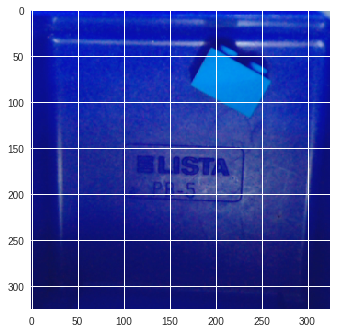

In [79]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
plt.imshow(X_train[60])
print(Y_train[0, 60])

In [80]:
import random
import copy

## Mix up data
num_switches = 100
for i in range(0, num_switches):
  rand1 = random.randint(0, X_train.shape[0]-1)
  rand2 = random.randint(0, X_train.shape[0]-1)
  temp = copy.copy(X_train[rand1])
  X_train[rand1] = X_train[rand2]
  X_train[rand2] = temp
  
  temp = copy.copy(Y_train[0, rand1])
  Y_train[0, rand1] = Y_train[0, rand2]
  Y_train[0, rand2] = temp
  
  print(str(rand1) + " " + str(rand2))
  
for i in range(0, num_switches):
  rand1 = random.randint(0, X_test.shape[0]-1)
  rand2 = random.randint(0, X_test.shape[0]-1)
  temp = copy.copy(X_test[rand1])
  X_test[rand1] = X_test[rand2]
  X_test[rand2] = temp
  
  temp = copy.copy(Y_test[0, rand1])
  Y_test[0, rand1] = Y_test[0, rand2]
  Y_test[0, rand2] = temp
  
  print(str(rand1) + " " + str(rand2))

82 149
83 45
91 49
75 73
53 65
148 71
58 138
78 28
119 83
0 148
116 5
9 55
70 57
58 35
2 59
111 149
25 45
104 52
116 135
65 60
4 144
161 46
53 52
116 122
108 156
16 70
87 127
8 20
86 52
118 16
24 30
80 5
38 51
146 70
147 116
0 114
27 46
27 104
142 116
17 106
148 32
42 88
99 64
55 42
53 10
51 69
98 24
25 34
167 49
77 94
62 142
147 70
19 62
119 18
80 121
25 21
67 80
121 151
93 25
102 97
28 81
46 96
36 37
62 0
154 73
14 77
72 79
135 95
78 19
68 147
54 17
42 161
156 62
127 119
70 94
36 165
60 109
168 151
4 25
140 61
44 63
61 79
139 81
41 159
38 106
85 158
158 118
3 72
152 157
53 33
40 129
151 127
31 48
92 13
127 158
161 155
32 165
141 101
99 132
60 77
5 112
47 24
69 66
94 90
70 77
67 90
99 114
72 47
56 118
91 99
45 48
91 72
96 115
5 97
3 90
31 41
3 55
78 90
39 105
15 108
56 32
61 56
82 120
57 70
59 87
88 117
36 51
86 41
18 48
1 61
39 107
78 121
85 33
65 94
11 121
75 35
39 4
82 41
59 85
58 38
39 74
64 111
97 76
93 6
25 75
55 67
12 69
94 25
65 78
11 61
10 34
24 3
65 17
118 38
91 56
56 112
24

0


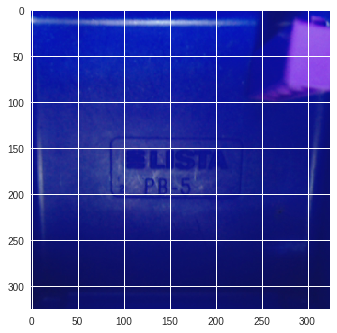

In [84]:
index = 12
plt.imshow(X_test[index])
print(Y_test[0, index])

1


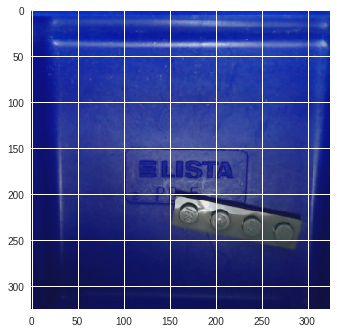

In [85]:
index = 155
plt.imshow(X_train[index])
print(Y_train[0, index])

In [86]:
print(X_train.shape)
print(Y_train.shape)

(170, 325, 325, 3)
(1, 170)


In [87]:
# Reshape the training and test examples 
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = X_train_flatten/255.
test_x = X_test_flatten/255.

train_y = Y_train
test_y = Y_test
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train_y's shape: " + str(train_y.shape))

train_x's shape: (316875, 170)
test_x's shape: (316875, 122)
train_y's shape: (1, 170)


In [0]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [0]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [0]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    #print("X is " + str(X.shape))
    #print("w is " + str(w.shape))
    #print("Y is " + str(Y.shape))
    A = sigmoid(np.dot(w.T, X) + b)                          # compute activation
    #print("A is " + str(A.shape))
    cost = (-1/m) * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))  # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [0]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [0]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [0]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [62]:
print(train_x.shape)
print(train_y.shape)

print(test_x.shape)

print(test_y.shape)


(316875, 207)
(1, 207)
(316875, 134)
(1, 134)


In [94]:
d = model(train_x, train_y, test_x, test_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


Cost after iteration 100: 0.005975
Cost after iteration 200: 0.004012
Cost after iteration 300: 0.003133
Cost after iteration 400: 0.002605
Cost after iteration 500: 0.002245
Cost after iteration 600: 0.001979
Cost after iteration 700: 0.001774
Cost after iteration 800: 0.001610
Cost after iteration 900: 0.001475
Cost after iteration 1000: 0.001362
Cost after iteration 1100: 0.001266
Cost after iteration 1200: 0.001183
Cost after iteration 1300: 0.001110
Cost after iteration 1400: 0.001046
Cost after iteration 1500: 0.000989
Cost after iteration 1600: 0.000939
Cost after iteration 1700: 0.000893
Cost after iteration 1800: 0.000851
Cost after iteration 1900: 0.000814
train accuracy: 100.0 %
test accuracy: 99.18032786885246 %


In [0]:
num_px = 325

y = 0, you predicted that it is 0.0


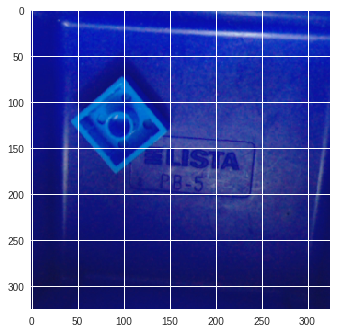

In [96]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_y[0,index]) + ", you predicted that it is " + str(d["Y_prediction_test"][0,index]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


y = 1.0


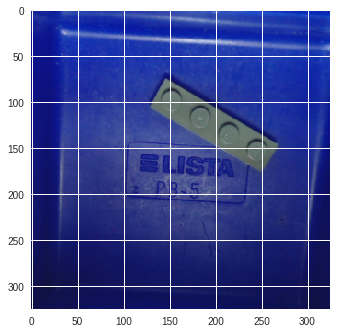

In [106]:
import scipy
index = 70
image = full_dataset[correct_x][index]
#image = full_dataset['L09_x'][index]
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)))

In [0]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 316875     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [0]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [37]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


In [0]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [39]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


In [0]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W, A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [0]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [0]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], "relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [0]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = (-1/m) * np.sum(Y*np.log(AL) + (1-Y)*np.log(1-AL))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [0]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [0]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [0]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = -np.divide(Y, AL) + np.divide(1-Y, 1-AL)
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads

In [0]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    ### END CODE HERE ###
    return parameters

In [0]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [52]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

ModuleNotFoundError: ignored

In [51]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

NameError: ignored

In [88]:
keys_x = [key for key in full_dataset if not key.find("_x") == -1]
keys_x.sort()
print(keys_x)

keys_y = [key for key in full_dataset if not key.find("_y") == -1]
keys_y.sort()
print(keys_y)

all_x = None
for key_x in keys_x:
  for im in full_dataset[key_x]:
    if all_x is None:
      all_x = np.array([im])
    else:
      all_x = np.append(all_x, [im], axis=0)
    print(all_x.shape)


['L01_x', 'L02_x', 'L03_x', 'L04_x', 'L05_x', 'L06_x', 'L07_x', 'L08_x', 'L09_x', 'L10_x', 'L11_x', 'L12_x', 'L13_x', 'L14_x', 'L15_x', 'L16_x', 'L17_x', 'L18_x', 'S1_x', 'S2_x', 'S3_x', 'S4_x', 'S5_x']
['L01_y', 'L02_y', 'L03_y', 'L04_y', 'L05_y', 'L06_y', 'L07_y', 'L08_y', 'L09_y', 'L10_y', 'L11_y', 'L12_y', 'L13_y', 'L14_y', 'L15_y', 'L16_y', 'L17_y', 'L18_y', 'S1_y', 'S2_y', 'S3_y', 'S4_y', 'S5_y']
(1, 325, 325, 3)
(2, 325, 325, 3)
(3, 325, 325, 3)
(4, 325, 325, 3)
(5, 325, 325, 3)
(6, 325, 325, 3)
(7, 325, 325, 3)
(8, 325, 325, 3)
(9, 325, 325, 3)
(10, 325, 325, 3)
(11, 325, 325, 3)
(12, 325, 325, 3)
(13, 325, 325, 3)
(14, 325, 325, 3)
(15, 325, 325, 3)
(16, 325, 325, 3)
(17, 325, 325, 3)
(18, 325, 325, 3)
(19, 325, 325, 3)
(20, 325, 325, 3)
(21, 325, 325, 3)
(22, 325, 325, 3)
(23, 325, 325, 3)
(24, 325, 325, 3)
(25, 325, 325, 3)
(26, 325, 325, 3)
(27, 325, 325, 3)
(28, 325, 325, 3)
(29, 325, 325, 3)
(30, 325, 325, 3)
(31, 325, 325, 3)
(32, 325, 325, 3)
(33, 325, 325, 3)
(34, 325,

KeyboardInterrupt: ignored

In [96]:
i = 0
all_y = None
for key_y in keys_y:
  for data in full_dataset[key_y]:
    i = i+1
print(i)
    #if all_y is None:
    #  all_y = np.array([data])
    #else:
    #  all_y = np.append(all_y, [data], axis=1)
    #print(all_y.shape)

3847


In [89]:
print(all_x.shape)

(3668, 325, 325, 3)


In [93]:
print(all_y[0,1,0])

0.0


In [0]:
all_x_copy = all_x


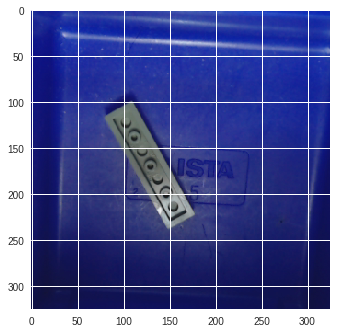

In [101]:
x = all_x_copy[1]
plt.imshow(x)

In [0]:
all_x = np.zeros((3847, 325, 325, 3))
print(all_x[0].shape)